In [27]:
import statsmodels.api as sm
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
%matplotlib inline
from statsmodels.stats.diagnostic import HetGoldfeldQuandt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn as sk
from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [8]:
def read_data():
    df = pd.read_csv("data/merged_data.csv")
    df.fillna(0, inplace = True)
    df.drop(set(df[df["HIVdiagnoses"] == 0].index), axis=0, inplace=True)
    cols = ["HIVdiagnoses", "HIVprevalence", "PLHIV", "Population"]
    X = pd.DataFrame(index=df["ADULTMEN"].index, columns=cols)
    for col in cols:
        X[col] = df[col]
    y = np.array(df["HIVincidence"])
    return df, X, y

In [4]:
x = df[['HIVdiagnoses', 'HIVprevalence', 'MSM12MTH', 'MSM5YEAR']]

TypeError: 'NoneType' object is not subscriptable

In [11]:
def read_data_new():
    df = pd.read_csv("data/merged_data.csv")
    df.fillna(0, inplace = True)
    df.drop(set(df[df["HIVdiagnoses"] == 0].index), axis=0, inplace=True)
    cols = ['HIVdiagnoses', 'HIVprevalence', 'MSM12MTH', 'MSM5YEAR']
    X = pd.DataFrame(index=df["ADULTMEN"].index, columns=cols)
    for col in cols:
        X[col] = df[col]
    y = np.array(df["HIVincidence"])
    return df, X, y

In [9]:
hiv_data, X, y = read_data()

In [12]:
hiv_data, Z, y = read_data_new()

In [13]:
model = sm.OLS(y, Z)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     92.44
Date:                Fri, 07 Jun 2019   Prob (F-statistic):           8.52e-64
Time:                        11:13:08   Log-Likelihood:                -3564.4
No. Observations:                 747   AIC:                             7137.
Df Residuals:                     743   BIC:                             7155.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
HIVdiagnoses      0.0504      0.018      2.732      0.006       0.014       0.087
HIVprevalence     0.0465      0.003     15.661      0.000       0.041       0.052
MSM12MTH          4.1338      2.988      1.384      0.167      -1.731       9.999
MSM5YEAR         -2.6746      1.933     -1.384      0.167      -6.469       1.119
==============================================================================
Omnibus:                     1791.275   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9830495.800
Skew:                          22.059   Prob(JB):                         0.00
Kurtosis:                     563.261   Cond. No.                     6.33e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
y_logged = np.log(y)

In [16]:
model = sm.OLS(y_logged, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     800.0
Date:                Fri, 07 Jun 2019   Prob (F-statistic):          1.62e-267
Time:                        11:14:57   Log-Likelihood:                -1155.8
No. Observations:                 747   AIC:                             2320.
Df Residuals:                     743   BIC:                             2338.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
HIVdiagnoses      0.0032      0.001      2.766      0.006       0.001       0.006
HIVprevalence     0.0058      0.000     47.409      0.000       0.006       0.006
PLHIV            -0.0006   4.01e-05    -14.324      0.000      -0.001      -0.000
Population     2.118e-06   1.33e-07     15.883      0.000    1.86e-06    2.38e-06
==============================================================================
Omnibus:                      493.502   Durbin-Watson:                   1.295
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13985.797
Skew:                          -2.514   Prob(JB):                         0.00
Kurtosis:                      23.593   Cond. No.                     1.96e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
params = results.params
params

HIVdiagnoses     0.003220
HIVprevalence    0.005788
PLHIV           -0.000575
Population       0.000002
dtype: float64

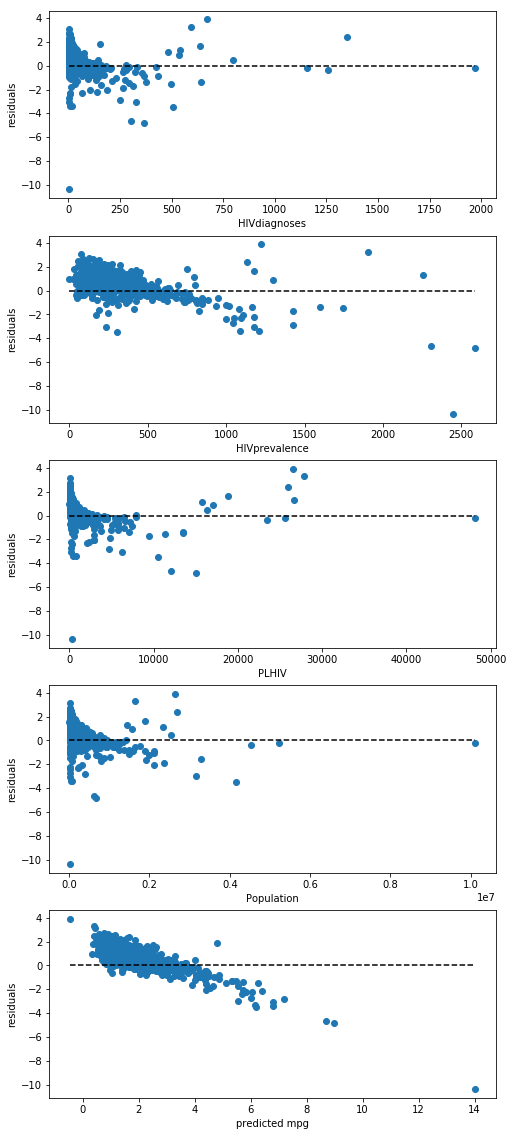

In [20]:
fig, axs = plt.subplots(5,1, figsize=(8,20))

axs[0].scatter(X['HIVdiagnoses'], results.resid)
axs[0].hlines(0,
              X['HIVdiagnoses'].min(), 
              X['HIVdiagnoses'].max(), 
              'k', linestyle='dashed')
axs[0].set_xlabel('HIVdiagnoses')
axs[0].set_ylabel('residuals');

axs[1].scatter(X['HIVprevalence'], results.resid)
axs[1].hlines(0,
              X['HIVprevalence'].min(), 
              X['HIVprevalence'].max(), 
              'k', linestyle='dashed')
axs[1].set_xlabel('HIVprevalence')
axs[1].set_ylabel('residuals');

axs[2].scatter(X['PLHIV'], results.resid)
axs[2].hlines(0,
              X['PLHIV'].min(), 
              X['PLHIV'].max(), 
              'k', linestyle='dashed')
axs[2].set_xlabel('PLHIV')
axs[2].set_ylabel('residuals');

axs[3].scatter(X['Population'], results.resid)
axs[3].hlines(0,
              X['Population'].min(), 
              X['Population'].max(), 
              'k', linestyle='dashed')
axs[3].set_xlabel('Population')
axs[3].set_ylabel('residuals');


axs[4].scatter(results.fittedvalues, results.resid)
axs[4].hlines(0,
              results.fittedvalues.min(), 
              results.fittedvalues.max(),
              'k', linestyle='dashed')
axs[4].set_xlabel('predicted mpg')
axs[4].set_ylabel('residuals');

In [21]:
f_statistic, p_value, _ = sm.stats.diagnostic.het_goldfeldquandt(y_logged, X, idx=1, alternative='two-sided')
print(p_value)

6.563169455896138e-55


In [23]:
stud_resids = results.outlier_test()['student_resid']


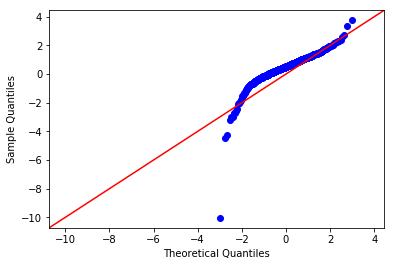

In [24]:
ax = sm.graphics.qqplot(stud_resids, line='45')

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [29]:
reg = KNeighborsRegressor()
reg.fit(X_train, y_train)
train_predicted = reg.predict(X_train)
test_predicted = reg.predict(X_test)

In [31]:
def my_rmse(y_true, y_pred):
    mse = ((y_true - y_pred)**2).mean()
    return np.sqrt(mse)

In [30]:
print('RMSE for training set ', my_rmse(y_train, train_predicted))
print('RMSE for test set ', my_rmse(y_test, test_predicted))

NameError: name 'my_rmse' is not defined